# Mask RCNN - train rocks dataset
Zhiang Chen, Dec 5, 2018
#### 1. import libraries

In [1]:
import os
import sys
import random
import math
import time
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

import rocks

Using TensorFlow backend.


#### 2. import dataset

In [2]:
config = rocks.RocksConfig()
config.display()

train_dataset = rocks.RocksDataset()
valid_dataset = rocks.RocksDataset()

train_dataset.load_rocks('../../dataset/zhiang_c3', 'train')
valid_dataset.load_rocks('../../dataset/zhiang_c3', 'val')

train_dataset.prepare()
valid_dataset.prepare()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        512
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL                  3
IMAGE_MAX_DIM                  384
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  384
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [384 384   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'mrcnn_mask_loss': 1.0, 'rpn_bbox_loss': 1.0, 'rpn_class_loss': 0.5, 'mrcnn_bbox_loss': 1.0, 'mrcnn_class_loss': 0.5}
MASK_POOL_SIZE                 14
MASK_SHAPE             

#### 3. create network model

In [3]:
ROOT_DIR = os.path.abspath("../../")
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

In [4]:
# the model will be saved under ../../logs
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [5]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)

#### 4. training model

In [6]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE, 
            epochs=600, 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /models/Mask_RCNN/logs/rocks20190214T2140/mask_rcnn_rocks_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4  

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/600
100/100 [==============================] - 196s 2s/step - loss: 2.5448 - rpn_class_loss: 0.3533 - rpn_bbox_loss: 0.9491 - mrcnn_class_loss: 0.0464 - mrcnn_bbox_loss: 0.6553 - mrcnn_mask_loss: 0.5407 - val_loss: 1.7580 - val_rpn_class_loss: 0.1981 - val_rpn_bbox_loss: 0.7077 - val_mrcnn_class_loss: 0.0454 - val_mrcnn_bbox_loss: 0.4221 - val_mrcnn_mask_loss: 0.3847
Epoch 2/600
100/100 [==============================] - 110s 1s/step - loss: 1.9634 - rpn_class_loss: 0.1922 - rpn_bbox_loss: 0.7458 - mrcnn_class_loss: 0.0507 - mrcnn_bbox_loss: 0.5211 - mrcnn_mask_loss: 0.4535 - val_loss: 1.9309 - val_rpn_class_loss: 0.1914 - val_rpn_bbox_loss: 0.7285 - val_mrcnn_class_loss: 0.0442 - val_mrcnn_bbox_loss: 0.4885 - val_mrcnn_mask_loss: 0.4783
Epoch 3/600
100/100 [==============================] - 110s 1s/step - loss: 1.9838 - rpn_class_loss: 0.1836 - rpn_bbox_loss: 0.7511 - mrcnn_class_loss: 0.0538 - mrcnn_bbox_loss: 0.5231 - mrcnn_mask_loss: 0.4721 - val_loss: 1.9594 - val_rpn_clas

Epoch 23/600
100/100 [==============================] - 112s 1s/step - loss: 1.7073 - rpn_class_loss: 0.1136 - rpn_bbox_loss: 0.6602 - mrcnn_class_loss: 0.1073 - mrcnn_bbox_loss: 0.4124 - mrcnn_mask_loss: 0.4138 - val_loss: 1.7202 - val_rpn_class_loss: 0.1109 - val_rpn_bbox_loss: 0.6922 - val_mrcnn_class_loss: 0.0674 - val_mrcnn_bbox_loss: 0.4237 - val_mrcnn_mask_loss: 0.4259
Epoch 24/600
100/100 [==============================] - 113s 1s/step - loss: 1.6418 - rpn_class_loss: 0.1027 - rpn_bbox_loss: 0.6667 - mrcnn_class_loss: 0.0956 - mrcnn_bbox_loss: 0.3807 - mrcnn_mask_loss: 0.3961 - val_loss: 1.7223 - val_rpn_class_loss: 0.1150 - val_rpn_bbox_loss: 0.7197 - val_mrcnn_class_loss: 0.0715 - val_mrcnn_bbox_loss: 0.3975 - val_mrcnn_mask_loss: 0.4186
Epoch 25/600
100/100 [==============================] - 112s 1s/step - loss: 1.6268 - rpn_class_loss: 0.1004 - rpn_bbox_loss: 0.6534 - mrcnn_class_loss: 0.0940 - mrcnn_bbox_loss: 0.3806 - mrcnn_mask_loss: 0.3984 - val_loss: 1.7274 - val_rpn_c

Epoch 45/600
100/100 [==============================] - 112s 1s/step - loss: 1.4759 - rpn_class_loss: 0.0836 - rpn_bbox_loss: 0.5734 - mrcnn_class_loss: 0.1126 - mrcnn_bbox_loss: 0.3378 - mrcnn_mask_loss: 0.3685 - val_loss: 1.6179 - val_rpn_class_loss: 0.0971 - val_rpn_bbox_loss: 0.6153 - val_mrcnn_class_loss: 0.0970 - val_mrcnn_bbox_loss: 0.4001 - val_mrcnn_mask_loss: 0.4083
Epoch 46/600
100/100 [==============================] - 112s 1s/step - loss: 1.4653 - rpn_class_loss: 0.0787 - rpn_bbox_loss: 0.5611 - mrcnn_class_loss: 0.1086 - mrcnn_bbox_loss: 0.3426 - mrcnn_mask_loss: 0.3744 - val_loss: 1.6293 - val_rpn_class_loss: 0.0941 - val_rpn_bbox_loss: 0.6462 - val_mrcnn_class_loss: 0.0976 - val_mrcnn_bbox_loss: 0.3781 - val_mrcnn_mask_loss: 0.4134
Epoch 47/600
100/100 [==============================] - 110s 1s/step - loss: 1.4883 - rpn_class_loss: 0.0805 - rpn_bbox_loss: 0.5700 - mrcnn_class_loss: 0.1151 - mrcnn_bbox_loss: 0.3485 - mrcnn_mask_loss: 0.3743 - val_loss: 1.6224 - val_rpn_c

Epoch 67/600
100/100 [==============================] - 112s 1s/step - loss: 1.4209 - rpn_class_loss: 0.0785 - rpn_bbox_loss: 0.5338 - mrcnn_class_loss: 0.1278 - mrcnn_bbox_loss: 0.3207 - mrcnn_mask_loss: 0.3602 - val_loss: 1.6609 - val_rpn_class_loss: 0.0970 - val_rpn_bbox_loss: 0.6229 - val_mrcnn_class_loss: 0.1229 - val_mrcnn_bbox_loss: 0.3673 - val_mrcnn_mask_loss: 0.4507
Epoch 68/600
100/100 [==============================] - 111s 1s/step - loss: 1.4236 - rpn_class_loss: 0.0765 - rpn_bbox_loss: 0.5308 - mrcnn_class_loss: 0.1202 - mrcnn_bbox_loss: 0.3303 - mrcnn_mask_loss: 0.3659 - val_loss: 1.5742 - val_rpn_class_loss: 0.0781 - val_rpn_bbox_loss: 0.6090 - val_mrcnn_class_loss: 0.0814 - val_mrcnn_bbox_loss: 0.3888 - val_mrcnn_mask_loss: 0.4169
Epoch 69/600
100/100 [==============================] - 110s 1s/step - loss: 1.4066 - rpn_class_loss: 0.0758 - rpn_bbox_loss: 0.5222 - mrcnn_class_loss: 0.1234 - mrcnn_bbox_loss: 0.3200 - mrcnn_mask_loss: 0.3653 - val_loss: 1.6784 - val_rpn_c

Epoch 89/600
100/100 [==============================] - 111s 1s/step - loss: 1.3732 - rpn_class_loss: 0.0797 - rpn_bbox_loss: 0.4921 - mrcnn_class_loss: 0.1360 - mrcnn_bbox_loss: 0.3109 - mrcnn_mask_loss: 0.3544 - val_loss: 1.4978 - val_rpn_class_loss: 0.0752 - val_rpn_bbox_loss: 0.5690 - val_mrcnn_class_loss: 0.0868 - val_mrcnn_bbox_loss: 0.3540 - val_mrcnn_mask_loss: 0.4128
Epoch 90/600
100/100 [==============================] - 111s 1s/step - loss: 1.3453 - rpn_class_loss: 0.0724 - rpn_bbox_loss: 0.4925 - mrcnn_class_loss: 0.1169 - mrcnn_bbox_loss: 0.3092 - mrcnn_mask_loss: 0.3543 - val_loss: 1.5006 - val_rpn_class_loss: 0.0724 - val_rpn_bbox_loss: 0.5836 - val_mrcnn_class_loss: 0.0886 - val_mrcnn_bbox_loss: 0.3515 - val_mrcnn_mask_loss: 0.4045
Epoch 91/600
100/100 [==============================] - 111s 1s/step - loss: 1.3000 - rpn_class_loss: 0.0650 - rpn_bbox_loss: 0.4862 - mrcnn_class_loss: 0.1069 - mrcnn_bbox_loss: 0.2975 - mrcnn_mask_loss: 0.3444 - val_loss: 1.5887 - val_rpn_c

Epoch 111/600
100/100 [==============================] - 110s 1s/step - loss: 1.3264 - rpn_class_loss: 0.0698 - rpn_bbox_loss: 0.4775 - mrcnn_class_loss: 0.1205 - mrcnn_bbox_loss: 0.3033 - mrcnn_mask_loss: 0.3553 - val_loss: 1.5995 - val_rpn_class_loss: 0.0847 - val_rpn_bbox_loss: 0.6045 - val_mrcnn_class_loss: 0.0974 - val_mrcnn_bbox_loss: 0.3804 - val_mrcnn_mask_loss: 0.4325
Epoch 112/600
100/100 [==============================] - 111s 1s/step - loss: 1.2723 - rpn_class_loss: 0.0583 - rpn_bbox_loss: 0.4812 - mrcnn_class_loss: 0.1003 - mrcnn_bbox_loss: 0.2906 - mrcnn_mask_loss: 0.3419 - val_loss: 1.5702 - val_rpn_class_loss: 0.0787 - val_rpn_bbox_loss: 0.5792 - val_mrcnn_class_loss: 0.1052 - val_mrcnn_bbox_loss: 0.3849 - val_mrcnn_mask_loss: 0.4223
Epoch 113/600
100/100 [==============================] - 111s 1s/step - loss: 1.3193 - rpn_class_loss: 0.0722 - rpn_bbox_loss: 0.4745 - mrcnn_class_loss: 0.1278 - mrcnn_bbox_loss: 0.2942 - mrcnn_mask_loss: 0.3505 - val_loss: 1.5595 - val_rp

Epoch 133/600
100/100 [==============================] - 110s 1s/step - loss: 1.3174 - rpn_class_loss: 0.0738 - rpn_bbox_loss: 0.4568 - mrcnn_class_loss: 0.1351 - mrcnn_bbox_loss: 0.2977 - mrcnn_mask_loss: 0.3541 - val_loss: 1.5170 - val_rpn_class_loss: 0.0784 - val_rpn_bbox_loss: 0.5618 - val_mrcnn_class_loss: 0.1006 - val_mrcnn_bbox_loss: 0.3590 - val_mrcnn_mask_loss: 0.4172
Epoch 134/600
100/100 [==============================] - 112s 1s/step - loss: 1.2632 - rpn_class_loss: 0.0627 - rpn_bbox_loss: 0.4613 - mrcnn_class_loss: 0.1088 - mrcnn_bbox_loss: 0.2873 - mrcnn_mask_loss: 0.3432 - val_loss: 1.5845 - val_rpn_class_loss: 0.0813 - val_rpn_bbox_loss: 0.5527 - val_mrcnn_class_loss: 0.1052 - val_mrcnn_bbox_loss: 0.4049 - val_mrcnn_mask_loss: 0.4405
Epoch 135/600
100/100 [==============================] - 111s 1s/step - loss: 1.2836 - rpn_class_loss: 0.0668 - rpn_bbox_loss: 0.4663 - mrcnn_class_loss: 0.1212 - mrcnn_bbox_loss: 0.2874 - mrcnn_mask_loss: 0.3419 - val_loss: 1.5767 - val_rp

Epoch 155/600
100/100 [==============================] - 112s 1s/step - loss: 1.3043 - rpn_class_loss: 0.0729 - rpn_bbox_loss: 0.4638 - mrcnn_class_loss: 0.1364 - mrcnn_bbox_loss: 0.2867 - mrcnn_mask_loss: 0.3444 - val_loss: 1.4306 - val_rpn_class_loss: 0.0712 - val_rpn_bbox_loss: 0.5033 - val_mrcnn_class_loss: 0.1041 - val_mrcnn_bbox_loss: 0.3536 - val_mrcnn_mask_loss: 0.3985
Epoch 156/600
100/100 [==============================] - 112s 1s/step - loss: 1.1306 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.4194 - mrcnn_class_loss: 0.0932 - mrcnn_bbox_loss: 0.2483 - mrcnn_mask_loss: 0.3170 - val_loss: 1.5003 - val_rpn_class_loss: 0.0731 - val_rpn_bbox_loss: 0.5484 - val_mrcnn_class_loss: 0.0961 - val_mrcnn_bbox_loss: 0.3578 - val_mrcnn_mask_loss: 0.4249
Epoch 157/600
100/100 [==============================] - 111s 1s/step - loss: 1.2134 - rpn_class_loss: 0.0577 - rpn_bbox_loss: 0.4469 - mrcnn_class_loss: 0.1098 - mrcnn_bbox_loss: 0.2673 - mrcnn_mask_loss: 0.3316 - val_loss: 1.5801 - val_rp

Epoch 177/600
100/100 [==============================] - 111s 1s/step - loss: 1.2125 - rpn_class_loss: 0.0650 - rpn_bbox_loss: 0.4273 - mrcnn_class_loss: 0.1199 - mrcnn_bbox_loss: 0.2662 - mrcnn_mask_loss: 0.3340 - val_loss: 1.5496 - val_rpn_class_loss: 0.0766 - val_rpn_bbox_loss: 0.5425 - val_mrcnn_class_loss: 0.0960 - val_mrcnn_bbox_loss: 0.4008 - val_mrcnn_mask_loss: 0.4338
Epoch 178/600
100/100 [==============================] - 111s 1s/step - loss: 1.2460 - rpn_class_loss: 0.0656 - rpn_bbox_loss: 0.4375 - mrcnn_class_loss: 0.1224 - mrcnn_bbox_loss: 0.2790 - mrcnn_mask_loss: 0.3415 - val_loss: 1.4498 - val_rpn_class_loss: 0.0782 - val_rpn_bbox_loss: 0.5231 - val_mrcnn_class_loss: 0.0952 - val_mrcnn_bbox_loss: 0.3564 - val_mrcnn_mask_loss: 0.3969
Epoch 179/600
100/100 [==============================] - 111s 1s/step - loss: 1.2412 - rpn_class_loss: 0.0652 - rpn_bbox_loss: 0.4377 - mrcnn_class_loss: 0.1218 - mrcnn_bbox_loss: 0.2760 - mrcnn_mask_loss: 0.3405 - val_loss: 1.5927 - val_rp

Epoch 199/600
100/100 [==============================] - 111s 1s/step - loss: 1.1888 - rpn_class_loss: 0.0610 - rpn_bbox_loss: 0.4254 - mrcnn_class_loss: 0.1158 - mrcnn_bbox_loss: 0.2605 - mrcnn_mask_loss: 0.3261 - val_loss: 1.4758 - val_rpn_class_loss: 0.0718 - val_rpn_bbox_loss: 0.5448 - val_mrcnn_class_loss: 0.1043 - val_mrcnn_bbox_loss: 0.3411 - val_mrcnn_mask_loss: 0.4138
Epoch 200/600
100/100 [==============================] - 111s 1s/step - loss: 1.1993 - rpn_class_loss: 0.0620 - rpn_bbox_loss: 0.4222 - mrcnn_class_loss: 0.1167 - mrcnn_bbox_loss: 0.2662 - mrcnn_mask_loss: 0.3321 - val_loss: 1.6002 - val_rpn_class_loss: 0.0769 - val_rpn_bbox_loss: 0.5684 - val_mrcnn_class_loss: 0.1083 - val_mrcnn_bbox_loss: 0.4153 - val_mrcnn_mask_loss: 0.4313
Epoch 201/600
100/100 [==============================] - 111s 1s/step - loss: 1.1860 - rpn_class_loss: 0.0583 - rpn_bbox_loss: 0.4271 - mrcnn_class_loss: 0.1125 - mrcnn_bbox_loss: 0.2617 - mrcnn_mask_loss: 0.3264 - val_loss: 1.5844 - val_rp

Epoch 221/600
100/100 [==============================] - 111s 1s/step - loss: 1.1557 - rpn_class_loss: 0.0603 - rpn_bbox_loss: 0.4113 - mrcnn_class_loss: 0.1144 - mrcnn_bbox_loss: 0.2496 - mrcnn_mask_loss: 0.3201 - val_loss: 1.3604 - val_rpn_class_loss: 0.0746 - val_rpn_bbox_loss: 0.4856 - val_mrcnn_class_loss: 0.1112 - val_mrcnn_bbox_loss: 0.3085 - val_mrcnn_mask_loss: 0.3804
Epoch 222/600
100/100 [==============================] - 111s 1s/step - loss: 1.1674 - rpn_class_loss: 0.0583 - rpn_bbox_loss: 0.4139 - mrcnn_class_loss: 0.1143 - mrcnn_bbox_loss: 0.2544 - mrcnn_mask_loss: 0.3266 - val_loss: 1.5118 - val_rpn_class_loss: 0.0717 - val_rpn_bbox_loss: 0.5552 - val_mrcnn_class_loss: 0.0989 - val_mrcnn_bbox_loss: 0.3487 - val_mrcnn_mask_loss: 0.4373
Epoch 223/600
100/100 [==============================] - 112s 1s/step - loss: 1.1445 - rpn_class_loss: 0.0607 - rpn_bbox_loss: 0.4054 - mrcnn_class_loss: 0.1120 - mrcnn_bbox_loss: 0.2432 - mrcnn_mask_loss: 0.3232 - val_loss: 1.5058 - val_rp

Epoch 243/600
100/100 [==============================] - 111s 1s/step - loss: 1.1370 - rpn_class_loss: 0.0577 - rpn_bbox_loss: 0.4079 - mrcnn_class_loss: 0.1122 - mrcnn_bbox_loss: 0.2404 - mrcnn_mask_loss: 0.3189 - val_loss: 1.5045 - val_rpn_class_loss: 0.0669 - val_rpn_bbox_loss: 0.5583 - val_mrcnn_class_loss: 0.0841 - val_mrcnn_bbox_loss: 0.3807 - val_mrcnn_mask_loss: 0.4145
Epoch 244/600
100/100 [==============================] - 112s 1s/step - loss: 1.2111 - rpn_class_loss: 0.0663 - rpn_bbox_loss: 0.4187 - mrcnn_class_loss: 0.1271 - mrcnn_bbox_loss: 0.2624 - mrcnn_mask_loss: 0.3365 - val_loss: 1.5091 - val_rpn_class_loss: 0.0594 - val_rpn_bbox_loss: 0.5443 - val_mrcnn_class_loss: 0.0756 - val_mrcnn_bbox_loss: 0.3917 - val_mrcnn_mask_loss: 0.4380
Epoch 245/600
100/100 [==============================] - 111s 1s/step - loss: 1.1054 - rpn_class_loss: 0.0553 - rpn_bbox_loss: 0.3957 - mrcnn_class_loss: 0.1098 - mrcnn_bbox_loss: 0.2315 - mrcnn_mask_loss: 0.3131 - val_loss: 1.6062 - val_rp

Epoch 265/600
100/100 [==============================] - 111s 1s/step - loss: 1.1110 - rpn_class_loss: 0.0553 - rpn_bbox_loss: 0.3909 - mrcnn_class_loss: 0.1120 - mrcnn_bbox_loss: 0.2365 - mrcnn_mask_loss: 0.3164 - val_loss: 1.5450 - val_rpn_class_loss: 0.0678 - val_rpn_bbox_loss: 0.5615 - val_mrcnn_class_loss: 0.0985 - val_mrcnn_bbox_loss: 0.4041 - val_mrcnn_mask_loss: 0.4131
Epoch 266/600
100/100 [==============================] - 112s 1s/step - loss: 1.1413 - rpn_class_loss: 0.0583 - rpn_bbox_loss: 0.3964 - mrcnn_class_loss: 0.1187 - mrcnn_bbox_loss: 0.2457 - mrcnn_mask_loss: 0.3221 - val_loss: 1.4914 - val_rpn_class_loss: 0.0577 - val_rpn_bbox_loss: 0.5390 - val_mrcnn_class_loss: 0.0760 - val_mrcnn_bbox_loss: 0.3987 - val_mrcnn_mask_loss: 0.4201
Epoch 267/600
100/100 [==============================] - 111s 1s/step - loss: 1.1284 - rpn_class_loss: 0.0557 - rpn_bbox_loss: 0.4032 - mrcnn_class_loss: 0.1084 - mrcnn_bbox_loss: 0.2390 - mrcnn_mask_loss: 0.3222 - val_loss: 1.4093 - val_rp

Epoch 287/600
100/100 [==============================] - 111s 1s/step - loss: 1.1479 - rpn_class_loss: 0.0619 - rpn_bbox_loss: 0.4024 - mrcnn_class_loss: 0.1213 - mrcnn_bbox_loss: 0.2433 - mrcnn_mask_loss: 0.3191 - val_loss: 1.2882 - val_rpn_class_loss: 0.0718 - val_rpn_bbox_loss: 0.4568 - val_mrcnn_class_loss: 0.1133 - val_mrcnn_bbox_loss: 0.2801 - val_mrcnn_mask_loss: 0.3662
Epoch 288/600
100/100 [==============================] - 111s 1s/step - loss: 1.1422 - rpn_class_loss: 0.0587 - rpn_bbox_loss: 0.4013 - mrcnn_class_loss: 0.1177 - mrcnn_bbox_loss: 0.2439 - mrcnn_mask_loss: 0.3206 - val_loss: 1.4444 - val_rpn_class_loss: 0.0628 - val_rpn_bbox_loss: 0.5560 - val_mrcnn_class_loss: 0.0796 - val_mrcnn_bbox_loss: 0.3374 - val_mrcnn_mask_loss: 0.4085
Epoch 289/600
100/100 [==============================] - 111s 1s/step - loss: 1.0678 - rpn_class_loss: 0.0516 - rpn_bbox_loss: 0.3683 - mrcnn_class_loss: 0.1000 - mrcnn_bbox_loss: 0.2320 - mrcnn_mask_loss: 0.3158 - val_loss: 1.4797 - val_rp

Epoch 309/600
100/100 [==============================] - 112s 1s/step - loss: 1.0484 - rpn_class_loss: 0.0542 - rpn_bbox_loss: 0.3582 - mrcnn_class_loss: 0.1061 - mrcnn_bbox_loss: 0.2231 - mrcnn_mask_loss: 0.3068 - val_loss: 1.3421 - val_rpn_class_loss: 0.0645 - val_rpn_bbox_loss: 0.4962 - val_mrcnn_class_loss: 0.1058 - val_mrcnn_bbox_loss: 0.2949 - val_mrcnn_mask_loss: 0.3808
Epoch 310/600
100/100 [==============================] - 112s 1s/step - loss: 1.0790 - rpn_class_loss: 0.0554 - rpn_bbox_loss: 0.3828 - mrcnn_class_loss: 0.1028 - mrcnn_bbox_loss: 0.2249 - mrcnn_mask_loss: 0.3131 - val_loss: 1.4294 - val_rpn_class_loss: 0.0688 - val_rpn_bbox_loss: 0.5088 - val_mrcnn_class_loss: 0.1057 - val_mrcnn_bbox_loss: 0.3504 - val_mrcnn_mask_loss: 0.3956
Epoch 311/600
100/100 [==============================] - 112s 1s/step - loss: 1.0840 - rpn_class_loss: 0.0502 - rpn_bbox_loss: 0.3808 - mrcnn_class_loss: 0.1003 - mrcnn_bbox_loss: 0.2355 - mrcnn_mask_loss: 0.3172 - val_loss: 1.4497 - val_rp

Epoch 331/600
100/100 [==============================] - 111s 1s/step - loss: 1.0355 - rpn_class_loss: 0.0467 - rpn_bbox_loss: 0.3777 - mrcnn_class_loss: 0.0945 - mrcnn_bbox_loss: 0.2122 - mrcnn_mask_loss: 0.3045 - val_loss: 1.4183 - val_rpn_class_loss: 0.0690 - val_rpn_bbox_loss: 0.5035 - val_mrcnn_class_loss: 0.1026 - val_mrcnn_bbox_loss: 0.3419 - val_mrcnn_mask_loss: 0.4013
Epoch 332/600
100/100 [==============================] - 112s 1s/step - loss: 1.0572 - rpn_class_loss: 0.0487 - rpn_bbox_loss: 0.3700 - mrcnn_class_loss: 0.1023 - mrcnn_bbox_loss: 0.2229 - mrcnn_mask_loss: 0.3133 - val_loss: 1.4774 - val_rpn_class_loss: 0.0768 - val_rpn_bbox_loss: 0.5375 - val_mrcnn_class_loss: 0.1129 - val_mrcnn_bbox_loss: 0.3396 - val_mrcnn_mask_loss: 0.4106
Epoch 333/600
100/100 [==============================] - 111s 1s/step - loss: 1.1006 - rpn_class_loss: 0.0578 - rpn_bbox_loss: 0.3828 - mrcnn_class_loss: 0.1137 - mrcnn_bbox_loss: 0.2311 - mrcnn_mask_loss: 0.3153 - val_loss: 1.4596 - val_rp

Epoch 353/600
100/100 [==============================] - 112s 1s/step - loss: 1.0651 - rpn_class_loss: 0.0537 - rpn_bbox_loss: 0.3703 - mrcnn_class_loss: 0.1077 - mrcnn_bbox_loss: 0.2214 - mrcnn_mask_loss: 0.3119 - val_loss: 1.3654 - val_rpn_class_loss: 0.0583 - val_rpn_bbox_loss: 0.5018 - val_mrcnn_class_loss: 0.0813 - val_mrcnn_bbox_loss: 0.3165 - val_mrcnn_mask_loss: 0.4076
Epoch 354/600
100/100 [==============================] - 111s 1s/step - loss: 1.0833 - rpn_class_loss: 0.0532 - rpn_bbox_loss: 0.3745 - mrcnn_class_loss: 0.1092 - mrcnn_bbox_loss: 0.2268 - mrcnn_mask_loss: 0.3196 - val_loss: 1.3780 - val_rpn_class_loss: 0.0666 - val_rpn_bbox_loss: 0.4927 - val_mrcnn_class_loss: 0.1108 - val_mrcnn_bbox_loss: 0.3106 - val_mrcnn_mask_loss: 0.3972
Epoch 355/600
100/100 [==============================] - 112s 1s/step - loss: 1.0295 - rpn_class_loss: 0.0504 - rpn_bbox_loss: 0.3589 - mrcnn_class_loss: 0.0962 - mrcnn_bbox_loss: 0.2162 - mrcnn_mask_loss: 0.3079 - val_loss: 1.2288 - val_rp

Epoch 375/600
100/100 [==============================] - 112s 1s/step - loss: 1.0832 - rpn_class_loss: 0.0565 - rpn_bbox_loss: 0.3738 - mrcnn_class_loss: 0.1119 - mrcnn_bbox_loss: 0.2253 - mrcnn_mask_loss: 0.3158 - val_loss: 1.5458 - val_rpn_class_loss: 0.0741 - val_rpn_bbox_loss: 0.5552 - val_mrcnn_class_loss: 0.1128 - val_mrcnn_bbox_loss: 0.3640 - val_mrcnn_mask_loss: 0.4397
Epoch 376/600
100/100 [==============================] - 111s 1s/step - loss: 1.0660 - rpn_class_loss: 0.0539 - rpn_bbox_loss: 0.3690 - mrcnn_class_loss: 0.1103 - mrcnn_bbox_loss: 0.2218 - mrcnn_mask_loss: 0.3110 - val_loss: 1.4121 - val_rpn_class_loss: 0.0672 - val_rpn_bbox_loss: 0.5178 - val_mrcnn_class_loss: 0.1067 - val_mrcnn_bbox_loss: 0.3202 - val_mrcnn_mask_loss: 0.4002
Epoch 377/600
100/100 [==============================] - 112s 1s/step - loss: 1.0272 - rpn_class_loss: 0.0520 - rpn_bbox_loss: 0.3556 - mrcnn_class_loss: 0.0984 - mrcnn_bbox_loss: 0.2141 - mrcnn_mask_loss: 0.3069 - val_loss: 1.4794 - val_rp

Epoch 397/600
100/100 [==============================] - 111s 1s/step - loss: 1.0213 - rpn_class_loss: 0.0519 - rpn_bbox_loss: 0.3576 - mrcnn_class_loss: 0.1006 - mrcnn_bbox_loss: 0.2095 - mrcnn_mask_loss: 0.3018 - val_loss: 1.4112 - val_rpn_class_loss: 0.0591 - val_rpn_bbox_loss: 0.5398 - val_mrcnn_class_loss: 0.0828 - val_mrcnn_bbox_loss: 0.3166 - val_mrcnn_mask_loss: 0.4130
Epoch 398/600
100/100 [==============================] - 112s 1s/step - loss: 1.1073 - rpn_class_loss: 0.0601 - rpn_bbox_loss: 0.3826 - mrcnn_class_loss: 0.1168 - mrcnn_bbox_loss: 0.2273 - mrcnn_mask_loss: 0.3205 - val_loss: 1.4682 - val_rpn_class_loss: 0.0775 - val_rpn_bbox_loss: 0.5222 - val_mrcnn_class_loss: 0.1246 - val_mrcnn_bbox_loss: 0.3256 - val_mrcnn_mask_loss: 0.4182
Epoch 399/600
100/100 [==============================] - 111s 1s/step - loss: 1.0392 - rpn_class_loss: 0.0527 - rpn_bbox_loss: 0.3520 - mrcnn_class_loss: 0.1091 - mrcnn_bbox_loss: 0.2143 - mrcnn_mask_loss: 0.3110 - val_loss: 1.3109 - val_rp

Epoch 419/600
100/100 [==============================] - 111s 1s/step - loss: 1.0360 - rpn_class_loss: 0.0525 - rpn_bbox_loss: 0.3542 - mrcnn_class_loss: 0.1090 - mrcnn_bbox_loss: 0.2127 - mrcnn_mask_loss: 0.3076 - val_loss: 1.4641 - val_rpn_class_loss: 0.0676 - val_rpn_bbox_loss: 0.5451 - val_mrcnn_class_loss: 0.1018 - val_mrcnn_bbox_loss: 0.3408 - val_mrcnn_mask_loss: 0.4088
Epoch 420/600
100/100 [==============================] - 112s 1s/step - loss: 0.9655 - rpn_class_loss: 0.0463 - rpn_bbox_loss: 0.3454 - mrcnn_class_loss: 0.0867 - mrcnn_bbox_loss: 0.1936 - mrcnn_mask_loss: 0.2935 - val_loss: 1.3338 - val_rpn_class_loss: 0.0619 - val_rpn_bbox_loss: 0.4589 - val_mrcnn_class_loss: 0.0919 - val_mrcnn_bbox_loss: 0.3189 - val_mrcnn_mask_loss: 0.4022
Epoch 421/600
100/100 [==============================] - 111s 1s/step - loss: 0.9803 - rpn_class_loss: 0.0488 - rpn_bbox_loss: 0.3336 - mrcnn_class_loss: 0.0931 - mrcnn_bbox_loss: 0.2052 - mrcnn_mask_loss: 0.2996 - val_loss: 1.3927 - val_rp

Epoch 441/600
100/100 [==============================] - 111s 1s/step - loss: 0.9721 - rpn_class_loss: 0.0491 - rpn_bbox_loss: 0.3384 - mrcnn_class_loss: 0.0967 - mrcnn_bbox_loss: 0.1927 - mrcnn_mask_loss: 0.2952 - val_loss: 1.4337 - val_rpn_class_loss: 0.0630 - val_rpn_bbox_loss: 0.5131 - val_mrcnn_class_loss: 0.1048 - val_mrcnn_bbox_loss: 0.3456 - val_mrcnn_mask_loss: 0.4071
Epoch 442/600
100/100 [==============================] - 113s 1s/step - loss: 1.0281 - rpn_class_loss: 0.0539 - rpn_bbox_loss: 0.3601 - mrcnn_class_loss: 0.1046 - mrcnn_bbox_loss: 0.2088 - mrcnn_mask_loss: 0.3007 - val_loss: 1.5278 - val_rpn_class_loss: 0.0611 - val_rpn_bbox_loss: 0.5324 - val_mrcnn_class_loss: 0.1104 - val_mrcnn_bbox_loss: 0.3758 - val_mrcnn_mask_loss: 0.4481
Epoch 443/600
100/100 [==============================] - 112s 1s/step - loss: 1.0050 - rpn_class_loss: 0.0506 - rpn_bbox_loss: 0.3546 - mrcnn_class_loss: 0.1011 - mrcnn_bbox_loss: 0.2024 - mrcnn_mask_loss: 0.2964 - val_loss: 1.3281 - val_rp

Epoch 463/600
100/100 [==============================] - 111s 1s/step - loss: 0.9607 - rpn_class_loss: 0.0472 - rpn_bbox_loss: 0.3306 - mrcnn_class_loss: 0.0959 - mrcnn_bbox_loss: 0.1953 - mrcnn_mask_loss: 0.2917 - val_loss: 1.4730 - val_rpn_class_loss: 0.0672 - val_rpn_bbox_loss: 0.5460 - val_mrcnn_class_loss: 0.0998 - val_mrcnn_bbox_loss: 0.3433 - val_mrcnn_mask_loss: 0.4167
Epoch 464/600
100/100 [==============================] - 111s 1s/step - loss: 0.9814 - rpn_class_loss: 0.0504 - rpn_bbox_loss: 0.3330 - mrcnn_class_loss: 0.0966 - mrcnn_bbox_loss: 0.2017 - mrcnn_mask_loss: 0.2996 - val_loss: 1.4791 - val_rpn_class_loss: 0.0741 - val_rpn_bbox_loss: 0.5053 - val_mrcnn_class_loss: 0.1036 - val_mrcnn_bbox_loss: 0.3478 - val_mrcnn_mask_loss: 0.4483
Epoch 465/600
100/100 [==============================] - 111s 1s/step - loss: 0.9804 - rpn_class_loss: 0.0520 - rpn_bbox_loss: 0.3321 - mrcnn_class_loss: 0.1009 - mrcnn_bbox_loss: 0.1960 - mrcnn_mask_loss: 0.2994 - val_loss: 1.3120 - val_rp

Epoch 485/600
100/100 [==============================] - 111s 1s/step - loss: 1.0188 - rpn_class_loss: 0.0543 - rpn_bbox_loss: 0.3499 - mrcnn_class_loss: 0.1064 - mrcnn_bbox_loss: 0.2038 - mrcnn_mask_loss: 0.3045 - val_loss: 1.4234 - val_rpn_class_loss: 0.0672 - val_rpn_bbox_loss: 0.5404 - val_mrcnn_class_loss: 0.0893 - val_mrcnn_bbox_loss: 0.3202 - val_mrcnn_mask_loss: 0.4063
Epoch 486/600
100/100 [==============================] - 111s 1s/step - loss: 1.0257 - rpn_class_loss: 0.0545 - rpn_bbox_loss: 0.3570 - mrcnn_class_loss: 0.1049 - mrcnn_bbox_loss: 0.2062 - mrcnn_mask_loss: 0.3031 - val_loss: 1.3937 - val_rpn_class_loss: 0.0679 - val_rpn_bbox_loss: 0.4968 - val_mrcnn_class_loss: 0.1097 - val_mrcnn_bbox_loss: 0.3120 - val_mrcnn_mask_loss: 0.4074
Epoch 487/600
100/100 [==============================] - 111s 1s/step - loss: 0.9703 - rpn_class_loss: 0.0485 - rpn_bbox_loss: 0.3403 - mrcnn_class_loss: 0.0961 - mrcnn_bbox_loss: 0.1948 - mrcnn_mask_loss: 0.2907 - val_loss: 1.3937 - val_rp

Epoch 507/600
100/100 [==============================] - 112s 1s/step - loss: 1.0131 - rpn_class_loss: 0.0546 - rpn_bbox_loss: 0.3480 - mrcnn_class_loss: 0.1063 - mrcnn_bbox_loss: 0.2035 - mrcnn_mask_loss: 0.3007 - val_loss: 1.3248 - val_rpn_class_loss: 0.0613 - val_rpn_bbox_loss: 0.5259 - val_mrcnn_class_loss: 0.0957 - val_mrcnn_bbox_loss: 0.2744 - val_mrcnn_mask_loss: 0.3675
Epoch 508/600
100/100 [==============================] - 113s 1s/step - loss: 0.9613 - rpn_class_loss: 0.0486 - rpn_bbox_loss: 0.3321 - mrcnn_class_loss: 0.0934 - mrcnn_bbox_loss: 0.1916 - mrcnn_mask_loss: 0.2957 - val_loss: 1.3191 - val_rpn_class_loss: 0.0603 - val_rpn_bbox_loss: 0.4606 - val_mrcnn_class_loss: 0.1112 - val_mrcnn_bbox_loss: 0.2814 - val_mrcnn_mask_loss: 0.4056
Epoch 509/600
100/100 [==============================] - 111s 1s/step - loss: 0.9249 - rpn_class_loss: 0.0469 - rpn_bbox_loss: 0.3197 - mrcnn_class_loss: 0.0863 - mrcnn_bbox_loss: 0.1847 - mrcnn_mask_loss: 0.2872 - val_loss: 1.2546 - val_rp

Epoch 529/600
100/100 [==============================] - 111s 1s/step - loss: 0.9141 - rpn_class_loss: 0.0467 - rpn_bbox_loss: 0.3119 - mrcnn_class_loss: 0.0910 - mrcnn_bbox_loss: 0.1818 - mrcnn_mask_loss: 0.2827 - val_loss: 1.3754 - val_rpn_class_loss: 0.0635 - val_rpn_bbox_loss: 0.5087 - val_mrcnn_class_loss: 0.0955 - val_mrcnn_bbox_loss: 0.3004 - val_mrcnn_mask_loss: 0.4073
Epoch 530/600
100/100 [==============================] - 111s 1s/step - loss: 0.9440 - rpn_class_loss: 0.0494 - rpn_bbox_loss: 0.3239 - mrcnn_class_loss: 0.0929 - mrcnn_bbox_loss: 0.1870 - mrcnn_mask_loss: 0.2907 - val_loss: 1.3542 - val_rpn_class_loss: 0.0663 - val_rpn_bbox_loss: 0.5088 - val_mrcnn_class_loss: 0.1031 - val_mrcnn_bbox_loss: 0.2991 - val_mrcnn_mask_loss: 0.3769
Epoch 531/600
100/100 [==============================] - 112s 1s/step - loss: 0.9483 - rpn_class_loss: 0.0492 - rpn_bbox_loss: 0.3274 - mrcnn_class_loss: 0.0951 - mrcnn_bbox_loss: 0.1878 - mrcnn_mask_loss: 0.2887 - val_loss: 1.4965 - val_rp

Epoch 551/600
100/100 [==============================] - 111s 1s/step - loss: 0.8956 - rpn_class_loss: 0.0487 - rpn_bbox_loss: 0.3056 - mrcnn_class_loss: 0.0905 - mrcnn_bbox_loss: 0.1742 - mrcnn_mask_loss: 0.2766 - val_loss: 1.3265 - val_rpn_class_loss: 0.0678 - val_rpn_bbox_loss: 0.4715 - val_mrcnn_class_loss: 0.1099 - val_mrcnn_bbox_loss: 0.2818 - val_mrcnn_mask_loss: 0.3956
Epoch 552/600
100/100 [==============================] - 111s 1s/step - loss: 0.9247 - rpn_class_loss: 0.0459 - rpn_bbox_loss: 0.3224 - mrcnn_class_loss: 0.0897 - mrcnn_bbox_loss: 0.1842 - mrcnn_mask_loss: 0.2824 - val_loss: 1.4592 - val_rpn_class_loss: 0.0620 - val_rpn_bbox_loss: 0.5458 - val_mrcnn_class_loss: 0.0920 - val_mrcnn_bbox_loss: 0.3378 - val_mrcnn_mask_loss: 0.4217
Epoch 553/600
100/100 [==============================] - 112s 1s/step - loss: 0.9640 - rpn_class_loss: 0.0515 - rpn_bbox_loss: 0.3278 - mrcnn_class_loss: 0.0991 - mrcnn_bbox_loss: 0.1900 - mrcnn_mask_loss: 0.2956 - val_loss: 1.4117 - val_rp

Epoch 573/600
100/100 [==============================] - 111s 1s/step - loss: 0.9141 - rpn_class_loss: 0.0488 - rpn_bbox_loss: 0.3063 - mrcnn_class_loss: 0.0936 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.2837 - val_loss: 1.2108 - val_rpn_class_loss: 0.0609 - val_rpn_bbox_loss: 0.4522 - val_mrcnn_class_loss: 0.0941 - val_mrcnn_bbox_loss: 0.2511 - val_mrcnn_mask_loss: 0.3525
Epoch 574/600
100/100 [==============================] - 111s 1s/step - loss: 0.9520 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.3242 - mrcnn_class_loss: 0.0938 - mrcnn_bbox_loss: 0.1882 - mrcnn_mask_loss: 0.2965 - val_loss: 1.3928 - val_rpn_class_loss: 0.0633 - val_rpn_bbox_loss: 0.4935 - val_mrcnn_class_loss: 0.1000 - val_mrcnn_bbox_loss: 0.3280 - val_mrcnn_mask_loss: 0.4080
Epoch 575/600
100/100 [==============================] - 112s 1s/step - loss: 0.9332 - rpn_class_loss: 0.0484 - rpn_bbox_loss: 0.3228 - mrcnn_class_loss: 0.0927 - mrcnn_bbox_loss: 0.1841 - mrcnn_mask_loss: 0.2851 - val_loss: 1.4582 - val_rp

Epoch 595/600
100/100 [==============================] - 112s 1s/step - loss: 0.9230 - rpn_class_loss: 0.0493 - rpn_bbox_loss: 0.3154 - mrcnn_class_loss: 0.0963 - mrcnn_bbox_loss: 0.1796 - mrcnn_mask_loss: 0.2824 - val_loss: 1.4327 - val_rpn_class_loss: 0.0579 - val_rpn_bbox_loss: 0.5170 - val_mrcnn_class_loss: 0.0865 - val_mrcnn_bbox_loss: 0.3419 - val_mrcnn_mask_loss: 0.4294
Epoch 596/600
100/100 [==============================] - 112s 1s/step - loss: 0.9303 - rpn_class_loss: 0.0494 - rpn_bbox_loss: 0.3210 - mrcnn_class_loss: 0.0913 - mrcnn_bbox_loss: 0.1839 - mrcnn_mask_loss: 0.2847 - val_loss: 1.2852 - val_rpn_class_loss: 0.0663 - val_rpn_bbox_loss: 0.4534 - val_mrcnn_class_loss: 0.1089 - val_mrcnn_bbox_loss: 0.2890 - val_mrcnn_mask_loss: 0.3676
Epoch 597/600
100/100 [==============================] - 111s 1s/step - loss: 0.8936 - rpn_class_loss: 0.0458 - rpn_bbox_loss: 0.3086 - mrcnn_class_loss: 0.0887 - mrcnn_bbox_loss: 0.1733 - mrcnn_mask_loss: 0.2773 - val_loss: 1.3890 - val_rp

In [ ]:
model.train(train_dataset, valid_dataset, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=1000, 
            layers="all")


Starting at epoch 600. LR=0.0001

Checkpoint Path: /models/Mask_RCNN/logs/rocks20190214T2140/mask_rcnn_rocks_{epoch:04d}.h5
Selecting layers to train
conv1                  (Conv2D)
bn_conv1               (BatchNorm)
res2a_branch2a         (Conv2D)
bn2a_branch2a          (BatchNorm)
res2a_branch2b         (Conv2D)
bn2a_branch2b          (BatchNorm)
res2a_branch2c         (Conv2D)
res2a_branch1          (Conv2D)
bn2a_branch2c          (BatchNorm)
bn2a_branch1           (BatchNorm)
res2b_branch2a         (Conv2D)
bn2b_branch2a          (BatchNorm)
res2b_branch2b         (Conv2D)
bn2b_branch2b          (BatchNorm)
res2b_branch2c         (Conv2D)
bn2b_branch2c          (BatchNorm)
res2c_branch2a         (Conv2D)
bn2c_branch2a          (BatchNorm)
res2c_branch2b         (Conv2D)
bn2c_branch2b          (BatchNorm)
res2c_branch2c         (Conv2D)
bn2c_branch2c          (BatchNorm)
res3a_branch2a         (Conv2D)
bn3a_branch2a          (BatchNorm)
res3a_branch2b         (Conv2D)
bn3a_branch2b

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:108: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.5/dist-packages/keras/engine/training_generator.py:46: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 601/1000
100/100 [==============================] - 181s 2s/step - loss: 0.9182 - rpn_class_loss: 0.0472 - rpn_bbox_loss: 0.3148 - mrcnn_class_loss: 0.0919 - mrcnn_bbox_loss: 0.1782 - mrcnn_mask_loss: 0.2861 - val_loss: 1.3462 - val_rpn_class_loss: 0.0590 - val_rpn_bbox_loss: 0.5023 - val_mrcnn_class_loss: 0.0825 - val_mrcnn_bbox_loss: 0.3034 - val_mrcnn_mask_loss: 0.3990
Epoch 602/1000
100/100 [==============================] - 124s 1s/step - loss: 0.9171 - rpn_class_loss: 0.0476 - rpn_bbox_loss: 0.3194 - mrcnn_class_loss: 0.0937 - mrcnn_bbox_loss: 0.1746 - mrcnn_mask_loss: 0.2819 - val_loss: 1.4896 - val_rpn_class_loss: 0.0691 - val_rpn_bbox_loss: 0.5309 - val_mrcnn_class_loss: 0.1093 - val_mrcnn_bbox_loss: 0.3435 - val_mrcnn_mask_loss: 0.4368
Epoch 603/1000
100/100 [==============================] - 123s 1s/step - loss: 0.9360 - rpn_class_loss: 0.0499 - rpn_bbox_loss: 0.3197 - mrcnn_class_loss: 0.0988 - mrcnn_bbox_loss: 0.1817 - mrcnn_mask_loss: 0.2860 - val_loss: 1.3441 - val

In [4]:
class InferenceConfig(rocks.RocksConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model_pred = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "logs/rocks20190214T2140/mask_rcnn_rocks_1000.h5")
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model_pred.load_weights(model_path, by_name=True)

Loading weights from  /models/Mask_RCNN/logs/rocks20190214T2140/mask_rcnn_rocks_1000.h5
Re-starting from epoch 1000


In [5]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

10
{'path': '../../dataset/zhiang_c3/val/8190_23790.jpg', 'annotation_path': '../../dataset/zhiang_c3/val/8190_23790.npy', 'source': 'rocks', 'height': 400, 'id': 10, 'width': 400}
original_image           shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
image_meta               shape: (14,)                 min:    0.00000  max:  400.00000  float64
gt_class_id              shape: (28,)                 min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (28, 4)               min:    1.00000  max:  384.00000  int32
gt_mask                  shape: (384, 384, 28)        min:    0.00000  max:    1.00000  bool


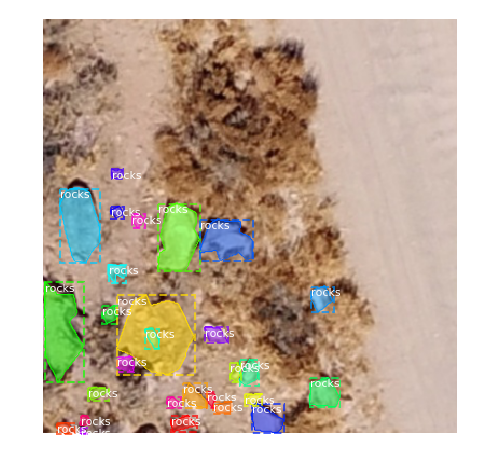

Processing 1 images
image                    shape: (384, 384, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 384, 384, 3)      min: -116.80000  max:  131.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  384.00000  int64
anchors                  shape: (1, 36828, 4)         min:   -0.23632  max:    1.06922  float32
(384, 384, 30)


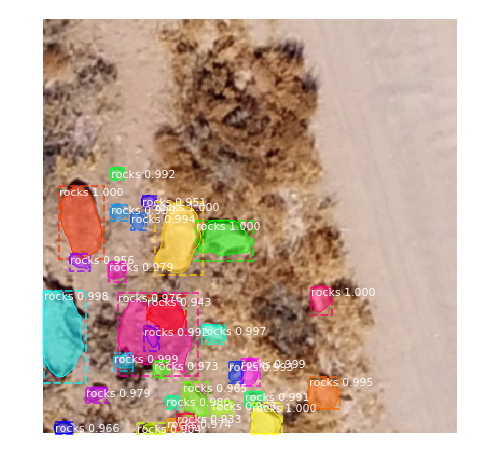

In [6]:
image_id = random.choice(valid_dataset.image_ids)
print(image_id)
print(valid_dataset.image_info[image_id])
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(valid_dataset, inference_config, 
                           image_id, use_mini_mask=False)
if gt_mask.shape[-1] != 0:
    log("original_image", original_image)
    log("image_meta", image_meta)
    log("gt_class_id", gt_class_id)
    log("gt_bbox", gt_bbox)
    log("gt_mask", gt_mask)

image = visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            train_dataset.class_names, figsize=(8, 8))

results = model_pred.detect([original_image], verbose=1)


r = results[0]
print(r['masks'].shape)

image = visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            valid_dataset.class_names, r['scores'], ax=get_ax())

In [106]:
print(np.max((gt_bbox[:,3]-gt_bbox[:,1])))
print(np.max((gt_bbox[:,2]-gt_bbox[:,0])))
print(np.max(r['rois'][:,3]-r['rois'][:,1]))
print(np.max(r['rois'][:,2]-r['rois'][:,0]))
print('-----')
print(np.min((gt_bbox[:,3]-gt_bbox[:,1])))
print(np.min((gt_bbox[:,2]-gt_bbox[:,0])))
print(np.min(r['rois'][:,3]-r['rois'][:,1]))
print(np.min(r['rois'][:,2]-r['rois'][:,0]))

141
164
116
153
-----
4
4
5
9


In [107]:
print(gt_bbox.shape)
print(gt_mask.shape)
filtered1 = (gt_bbox[:,3]-gt_bbox[:,1])>7
filtered2 = (gt_bbox[:,2]-gt_bbox[:,0])>7
filtered = np.logical_and(filtered1, filtered2)
print(np.sum(filtered))
filtered1 = (r['rois'][:,3]-r['rois'][:,1])>7
filtered2 = (r['rois'][:,2]-r['rois'][:,0])>7
filtered = np.logical_and(filtered1, filtered2)
print(np.sum(filtered))

(79, 4)
(384, 384, 79)
60
60
